Importing the necessary libraries for training and visualization of ML models

In [432]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline

%matplotlib inline

#reading the csv data from csv
df = pd.read_csv("energy.csv")

#dropping the rows with empty values
df.dropna(thresh = 3, inplace = True)
df.dropna(axis = 1, inplace = True)

#renaming the rows to have more descriptive names
df.columns = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution', 'Heating Load', 'Cooling Load']
results_df = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])

#checking the data
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [433]:
#eXploring the data to get the general idea of what is happening
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


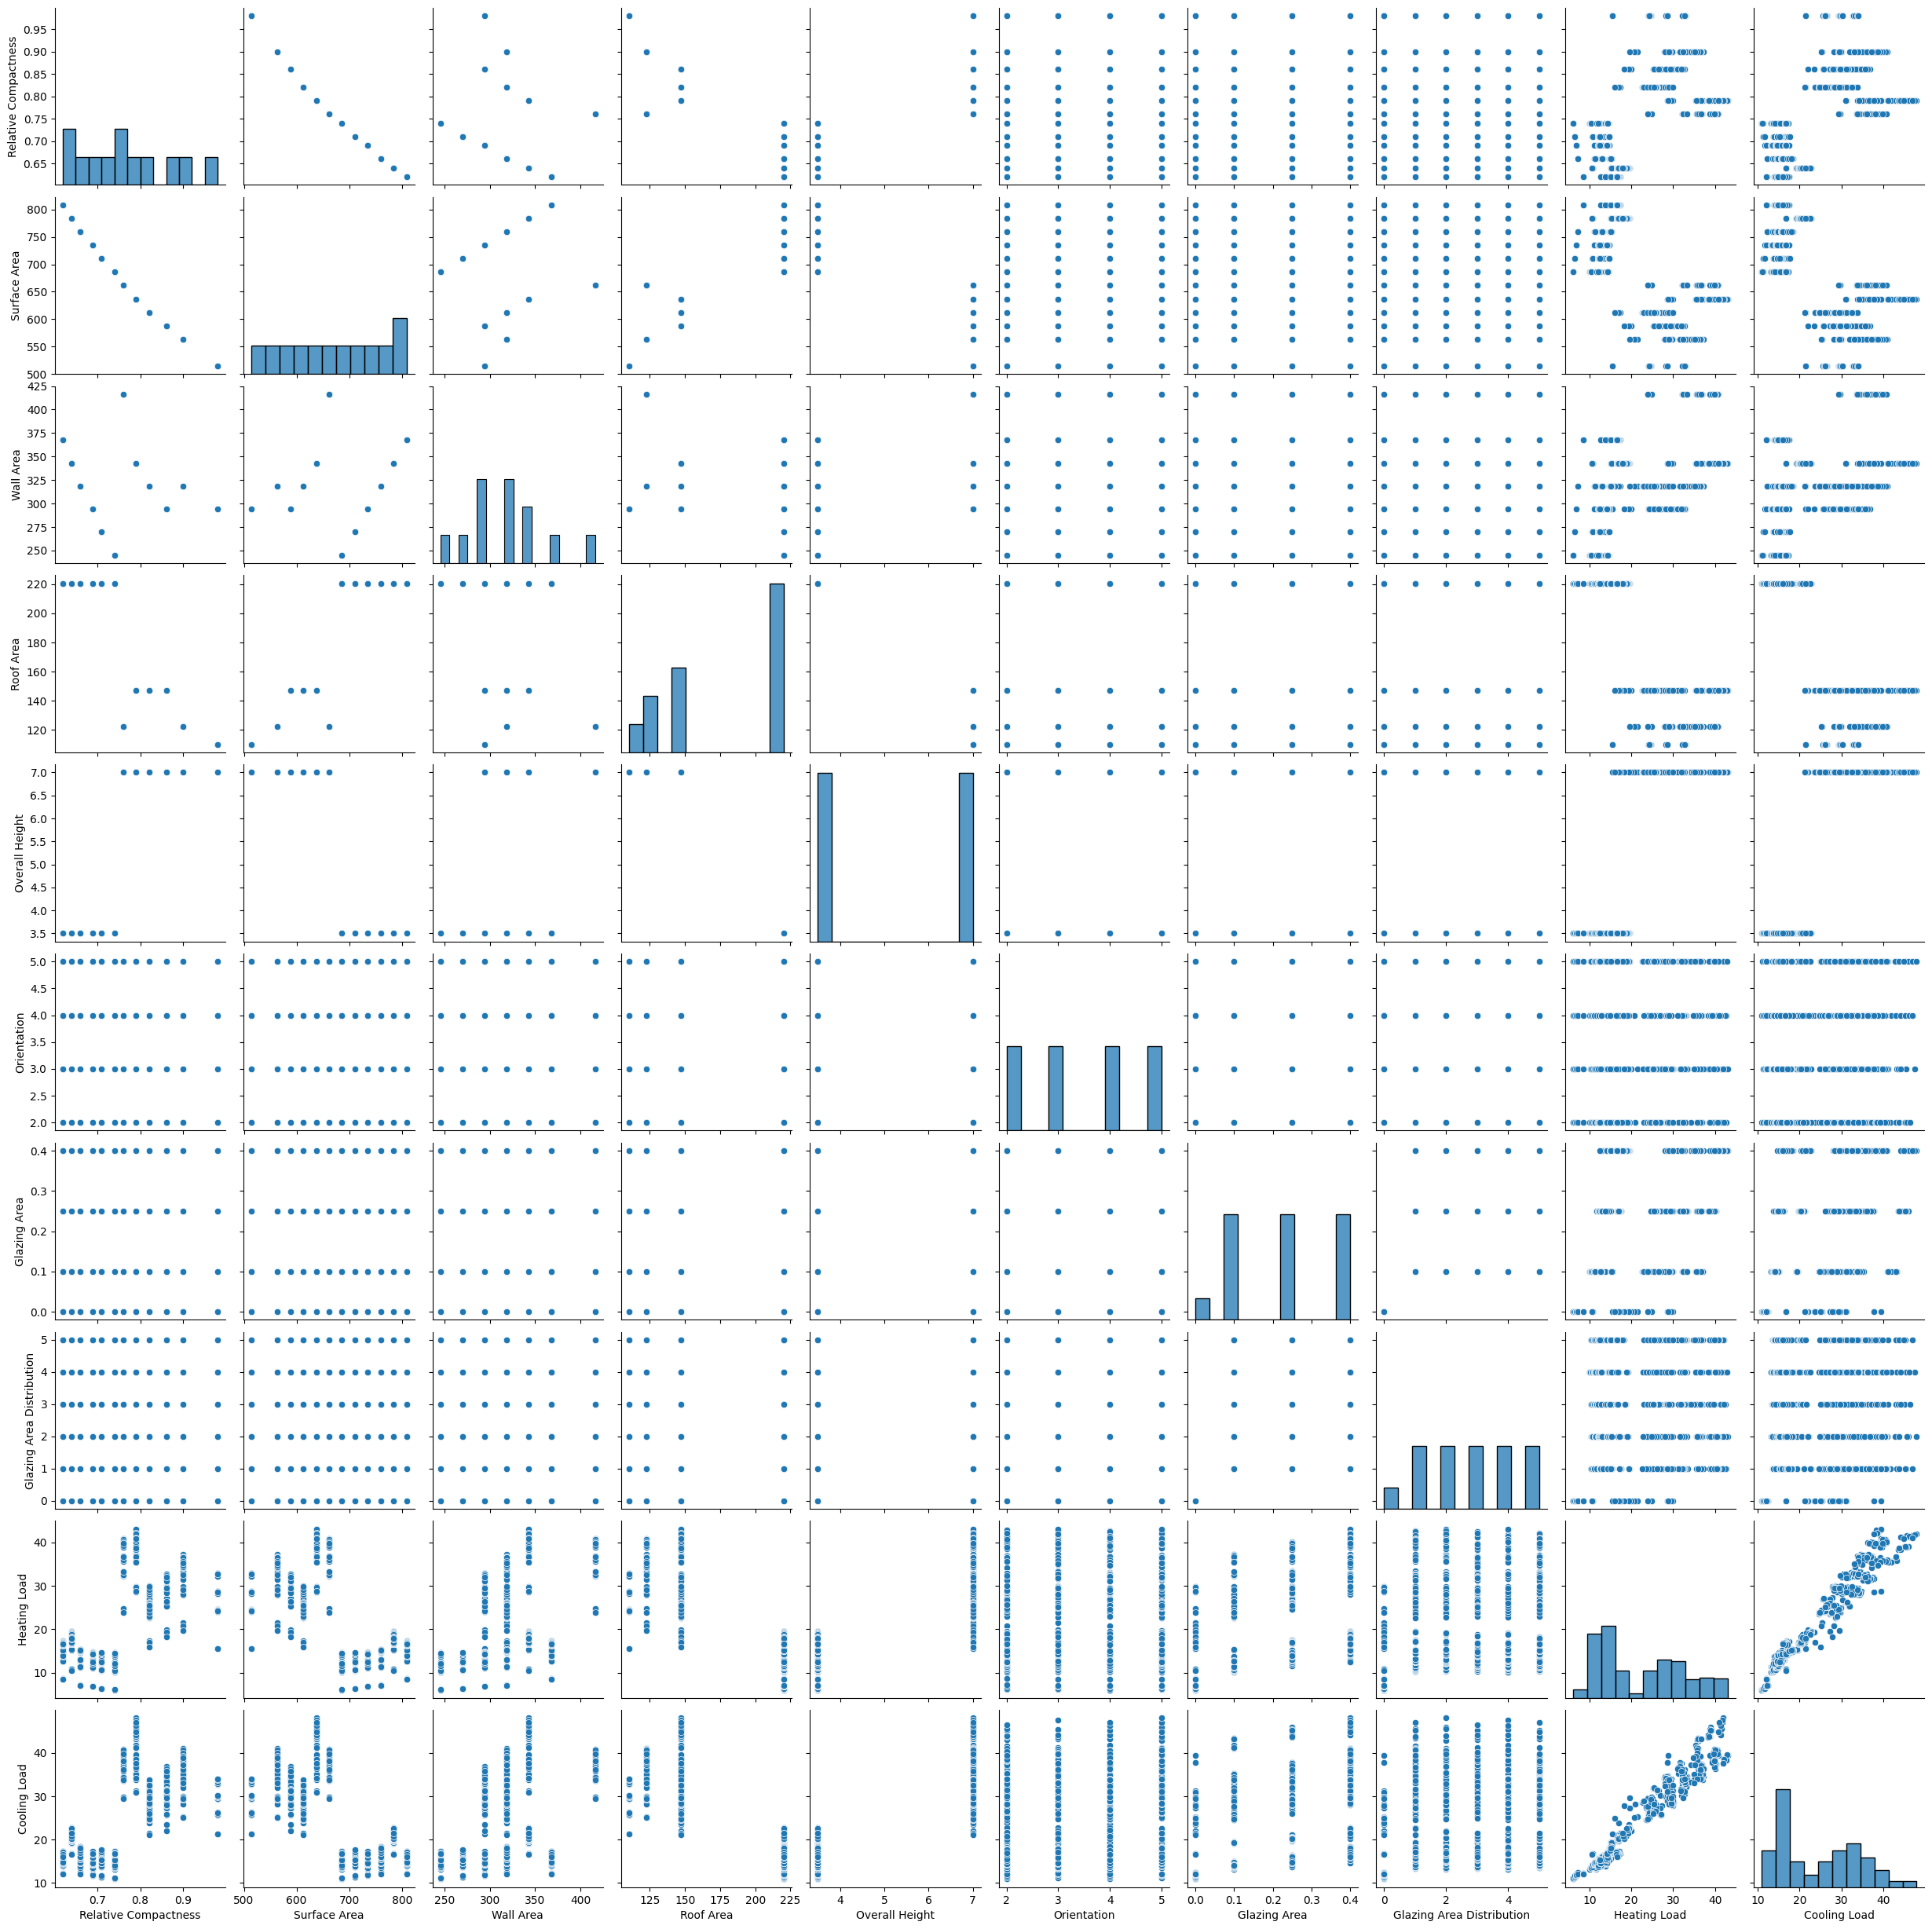

In [434]:
sns.pairplot(df)

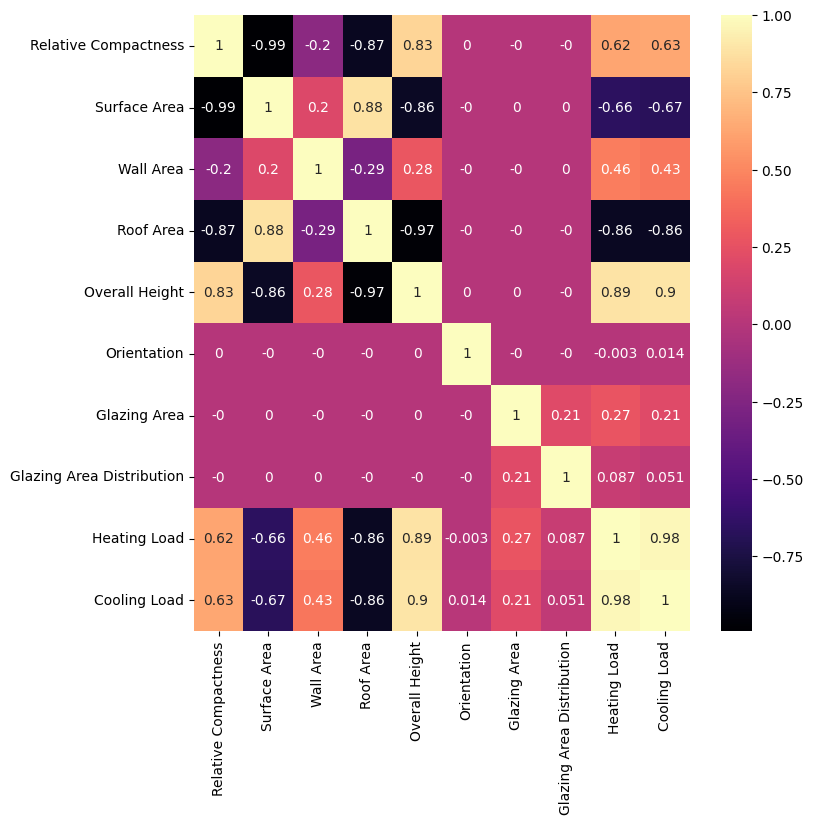

In [435]:
corrMatrix = df.corr()
fig, ax = plt.subplots(1,1, figsize = (8,8))

#create a sns heatmap
sns.heatmap(corrMatrix.round(3), annot = True,
           ax = ax, cmap = "magma")

#show the plot
plt.show()

In [436]:
#setting up parameters
x = df[['Relative Compactness', 'Surface Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']] 
y = df[["Cooling Load"]]

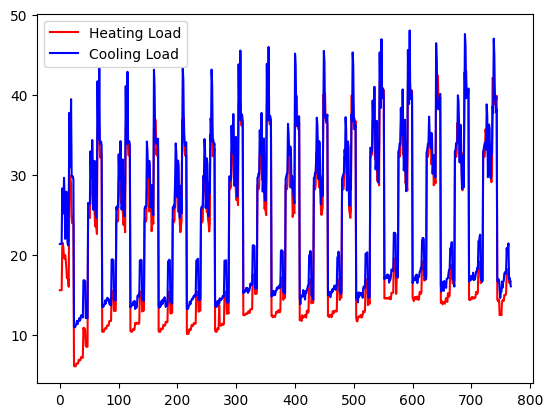

In [437]:
#Visualizing the outcome values
plt.plot(df['Heating Load'], 'red') 
plt.plot(df['Cooling Load'], 'blue')
plt.legend(['Heating Load', 'Cooling Load'])
plt.show()

Splitting the data

In [438]:
#creating the training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

Creating evaluation functions for models

In [439]:
#cross evaluation of models

def cross_val(model):
    pred = cross_val_score(model, x, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

Multiple regression

In [440]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
model = lr.fit(x_train, y_train)


In [441]:
lr.intercept_, lr.coef_

(array([94.79585038]),
 array([[-6.76786612e+01, -4.06447187e-02, -9.38543377e-02,
          4.12164119e+00,  1.12830313e-01,  1.43169574e+01,
          2.61116398e-02]]))

In [442]:
test_pred = lr.predict(x_test)
train_pred = lr.predict(x_train)
val_pred = lr.predict(x_val)

print('Test set evaluation:', (y_test, test_pred))
print('Train set evaluation:', (y_train, train_pred))
print('Validation set evaluation:',(y_val, val_pred))

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])



Test set evaluation: (     Cooling Load
285         13.97
101         29.44
581         35.39
352         43.86
726         38.79
..            ...
563         17.20
318         15.44
154         25.90
684         28.20
643         38.23

[154 rows x 1 columns], array([[15.60543296],
       [30.15849823],
       [34.45358544],
       [34.35104616],
       [34.64475067],
       [17.256257  ],
       [15.22154371],
       [30.05916743],
       [17.57534621],
       [29.76996679],
       [19.07213462],
       [32.30604183],
       [33.48153552],
       [19.21946033],
       [16.15018281],
       [34.6895371 ],
       [31.05807448],
       [19.38451392],
       [17.8135836 ],
       [35.65032838],
       [33.50764716],
       [12.54969033],
       [31.53354091],
       [19.7161799 ],
       [16.6536123 ],
       [34.36686676],
       [19.70935494],
       [15.69215164],
       [36.5247014 ],
       [17.9054534 ],
       [32.18059939],
       [34.4274738 ],
       [14.92437312],
       [18.

In [443]:
#train error
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))

3.0486289673774114

In [444]:
#test error
np.sqrt(mean_squared_error(y_test, model.predict(x_test)))

3.6368711798372875

In [445]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, x_train, y_train, cv = 10, scoring = "neg_mean_squared_error") ##k-fold cross validation mse
np.mean(-cross_val_score(model, x_train, y_train, cv = 10, scoring = "neg_mean_squared_error")) #actual performance of our model

9.658876753460223

In [446]:
model.score(x,y)

0.8875734195070526

Lasso regression model with regularization of alpha values


In [447]:
#training the model with the best alpha value found: 0.001

#pipeline creation
from sklearn.pipeline import make_pipeline

lasso_model = make_pipeline(
    StandardScaler(with_mean=False),
    Lasso(alpha=0.001, precompute=True, positive=True, selection='random', random_state=10)
)
lasso_model.fit(x_train, y_train)

test_pred = lasso_model.predict(x_test)
train_pred = lasso_model.predict(x_train)
val_pred = lasso_model.predict(x_val)

#training the model with alpha value: 0.5

lasso05 = make_pipeline(
    StandardScaler(with_mean=False),
    Lasso(alpha=0.5, precompute=True, positive=True, selection='random', random_state=10)
)
lasso05.fit(x_train,y_train)

train_score05=lasso05.score(x_train,y_train)
test_score05=lasso05.score(x_test,y_test)
val_score05=lasso05.score(x_val,y_val)

#training the model with alpha value: 0.5

lasso1 = make_pipeline(
    StandardScaler(with_mean=False),
    Lasso(alpha=1, precompute=True, positive=True, selection='random', random_state=10)
)
lasso1.fit(x_train,y_train)

train_score1=lasso1.score(x_train,y_train)
test_score1=lasso1.score(x_test,y_test)
val_score1=lasso1.score(x_val,y_val)


#training the model with alpha value: 0.01

lasso001 = make_pipeline(
    StandardScaler(with_mean=False),
    Lasso(alpha=0.01, precompute=True, positive=True, selection='random', random_state=10)
)
lasso001.fit(x_train,y_train)

train_score001=lasso001.score(x_train,y_train)
test_score001=lasso001.score(x_test,y_test)
val_score001=lasso001.score(x_val,y_val)


print('Test set evaluation:')
print_evaluate(y_test, test_pred)
print('Train set evaluation:')
print_evaluate(y_train, train_pred)
print('Validation set evaluation:')
print_evaluate(y_val, val_pred)


results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred), cross_val(lasso_model)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

print("\nTest set score for alpha=1 : ", test_score1)
print("Training set score for alpha=1: ", train_score1)
print("Validation set score for alpha=1: ", val_score1)

print("\nTest set score for alpha=0.5: ", test_score05)
print("Training set score for alpha=0.5: ", train_score05)
print("Validation set score for alpha=0.05: ", val_score05)

print("\nTest set score for alpha=0.01: ", test_score001)
print("Training set score for alpha=0.01: ", train_score001)
print("Validation set score for alpha=0.01: ", val_score001)

Test set evaluation:
MAE: 2.689330837699232
MSE: 13.953680216653673
RMSE: 3.735462517099278
R2 Square 0.8500988233717625
__________________________________
Train set evaluation:
MAE: 2.2181363183919474
MSE: 9.952751822145979
RMSE: 3.1547982220969346
R2 Square 0.8881614788630873
__________________________________
Validation set evaluation:
MAE: 2.300899240722219
MSE: 10.311958821363366
RMSE: 3.2112238821613426
R2 Square 0.8859470109039171
__________________________________

Test set score for alpha=1 :  0.7943365473941968
Training set score for alpha=1:  0.8321573758118022
Validation set score for alpha=1:  0.8109955123491494

Test set score for alpha=0.5:  0.8124805973288471
Training set score for alpha=0.5:  0.848955406227826
Validation set score for alpha=0.05:  0.831719894651445

Test set score for alpha=0.01:  0.8500923526014251
Training set score for alpha=0.01:  0.888143843293964
Validation set score for alpha=0.01:  0.885539532748735


In [448]:
print("Lasso regression Coefficients:", lasso_model.named_steps['lasso'].coef_)

params = x.columns
coeffs = lasso_model.named_steps['lasso'].coef_
filtered_params = params[coeffs == 0]
print('Parameters filtered out by Lasso:', filtered_params)

Lasso regression Coefficients: [ 0.          3.32224207  0.         11.35564694  0.12256017  1.88051227
  0.01256881]
Parameters filtered out by Lasso: Index(['Relative Compactness', 'Roof Area'], dtype='object')


Polynomial regression

In [449]:
poly_regression = make_pipeline(
    PolynomialFeatures(degree=4),
    StandardScaler(with_mean=False),
    LinearRegression()
)

poly_regression.fit(x_train, y_train)

test_pred = poly_regression.predict(x_test)
train_pred = poly_regression.predict(x_train)
val_pred = poly_regression.predict(x_val)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val, val_pred)

results_df_2 = pd.DataFrame(data=[["Polynomial Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)


Test set evaluation:
_____________________________________
MAE: 1.2342654220779221
MSE: 3.1114724476603723
RMSE: 1.7639366336862479
R2 Square 0.9665741672656387
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.6423020125679347
MSE: 0.9808176271662503
RMSE: 0.9903623716429508
R2 Square 0.9889786066318654
__________________________________
Val set evaluation:
_____________________________________
MAE: 0.9358080103490259
MSE: 1.9531113083653635
RMSE: 1.3975375874606606
R2 Square 0.9783980728962046
__________________________________


In [450]:
coefficients = poly_regression.named_steps['linearregression'].coef_
print('Polynomial regression coefficients:', coefficients)

Polynomial regression coefficients: [[-4.32422578e+11  2.36278620e+12 -6.72977671e+11 -1.61375267e+11
  -3.38706159e+11 -3.12056280e+11 -2.58075862e+11  6.05264125e+10
  -4.10885657e+11 -1.51416745e+10 -8.01862203e+11 -3.64338709e+11
  -4.37207984e+08  1.68453759e+11 -1.76394419e+11  3.72745341e+11
   4.25176417e+11  1.64123634e+11 -1.05422652e+11  7.61591541e+10
  -7.13987144e+09  5.12196752e+11  2.36571003e+10  4.12621396e+11
  -1.14485900e+11 -8.62402536e+10  4.46309957e+10  8.78078116e+10
   2.46652088e+10  1.89318037e+11  6.48929448e+10 -1.50684523e+11
  -7.57588635e+10 -7.74173658e+10  1.15445924e+10  3.74395913e+10
  -3.68996150e+11 -5.38763228e+11 -5.62098431e+11 -2.30838663e+11
   5.09433450e+10  2.75732377e+10  3.62102129e+10  3.98263495e+10
  -2.36886081e+10 -4.47005650e+10  4.13325709e+10 -1.15120910e+11
  -5.73321908e+10 -1.83143659e+11 -1.62652747e+11 -5.16138476e+10
  -1.32241649e+11  1.13616771e+11 -1.75681429e+11  1.64666269e+10
   7.14791833e+10 -1.01132427e+10 -1.672

Ridge Regression

In [451]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn import model_selection
from sklearn.linear_model import RidgeCV

In [452]:
X = df.drop(["Heating Load","Cooling Load"], axis=1) #dependent variables
y = df[["Cooling Load"]] #independent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42) # Train test split

In [453]:
ridge_model = Ridge(alpha=0.0, solver='saga', tol=0.01, random_state=20)
ridge_model.fit(X_train, y_train)
pred = ridge_model.predict(X_test)

test_pred = ridge_model.predict(X_test)
train_pred = ridge_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 3.2624931895305664
MSE: 19.37627831364172
RMSE: 4.401849419691878
R2 Square 0.7924677191501
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.0062296269919795
MSE: 18.09845704322967
RMSE: 4.254228137186542
R2 Square 0.7970341531823713
__________________________________


In [454]:
ridge_model.intercept_

array([31.51488985])

In [455]:
ridge_model.coef_

array([[-0.02349732, -0.04041216,  0.08221294, -0.06131255,  0.76061281,
         0.00634431,  0.21978136,  0.26939229]])

In [456]:
ridge_model.score(X,y)

0.796228536014215

In [457]:
#import the model
from sklearn.linear_model import RidgeCV#create the model
ridgeCV_model = RidgeCV(alphas = np.logspace(-6, 6, 13))
#implement it on training data
ridgeCV_model.fit(X_train, y_train)


RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]))

Extracting the best alpha value:

In [458]:
optimal_alpha = ridgeCV_model.alpha_
print(optimal_alpha)

0.001


Redoing the model to see the performance change

In [459]:
#implement the model with the new alpha
ridge_model = Ridge(alpha = 0.001)
#fit the model
ridge_model.fit(X_train, y_train)#check the score on the original data
print(ridge_model.score(X_train, y_train))#check the score with the new data
print(ridge_model.score(X_test, y_test))

0.885390628815675
0.8924834947912204


In [460]:
ridge_model.score(X,y)

0.8874332869642526

Evaluation of effectivity

In [461]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,2.628250,13.226832,3.636871,0.857907,0.876639
1,Lasso Regression,2.689331,13.953680,3.735463,0.850099,0.870790
2,Polynomial Regression,1.234265,3.111472,1.763937,0.966574,0.000000
3,Ridge Regression,3.262493,19.376278,4.401849,0.792468,0.870432


Sources: 
https://towardsdatascience.com/an-introduction-lasso-and-ridge-regression-using-scitkit-learn-d3427700679c
https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b
https://archive.ics.uci.edu/ml/datasets/energy+efficiency
https://www.kaggle.com/code/faressayah/practical-introduction-to-10-regression-algorithm#%E2%9C%94%EF%B8%8F-Polynomial-Regression
https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb
